<a href="https://colab.research.google.com/github/sarkarsouvik829/learn_transformers/blob/main/positional_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers torch

# 1. Tokenization

In [19]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Tokenize input sentence
sentence = "Tokenization is essential for any AI organization."
tokens = tokenizer.tokenize(sentence)


In [ ]:
print(tokens)

['token', '##ization', 'is', 'essential', 'for', 'any', 'ai', 'organization', '.']


# 2. Embeddings

Once tokenized, each word (or subword) is mapped to a high-dimensional vector using embeddings. This is where words stop being words and become numbers!

Why is this important? Because embeddings capture meaning and relationships between words. Unlike one-hot encoding (where every word is just a unique ID), embeddings represent words in a way that reflects their meaning.

For example:
📍 King - Man + Woman ≈ Queen
📍 Paris - France + Italy ≈ Rome

This happens because similar words have similar embeddings, and their relationships emerge naturally in the learned space.

In [20]:
input_ids = tokenizer.encode(sentence, return_tensors="pt")

# Get embeddings from BERT
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs.last_hidden_state  # Shape: (1, sequence_length, hidden_size)

# Print token-wise embeddings
for token, embedding in zip(tokens, embeddings[0]):
    print(f"Token: {token} -> Embedding: {embedding[:5]}...")  # Showing only first 5 values

Token: token -> Embedding: tensor([-0.4691, -0.1613, -0.4374,  0.0752, -0.5703])...
Token: ##ization -> Embedding: tensor([-0.5442, -0.0559, -0.8279, -0.3151, -0.1229])...
Token: is -> Embedding: tensor([-0.5498, -0.5570, -0.5254,  0.3701,  0.4370])...
Token: essential -> Embedding: tensor([-0.4953, -0.4014,  0.2123,  0.1217,  0.1697])...
Token: for -> Embedding: tensor([ 0.0313,  0.0174, -0.0993,  0.3831,  0.6161])...
Token: any -> Embedding: tensor([-0.1266,  0.1941,  0.5250,  0.3075, -0.3373])...
Token: ai -> Embedding: tensor([-0.5191,  0.2360,  0.1873, -0.0810, -0.4449])...
Token: organization -> Embedding: tensor([-0.3126,  0.3171,  0.2675, -0.0562,  1.0097])...
Token: . -> Embedding: tensor([-0.2083, -0.1946, -0.1072, -0.0192,  0.0847])...


# 3. Positional Encoding

In [21]:
import numpy as np
import matplotlib.pyplot as plt


===== Token Embeddings with Positional Encodings =====

Token: token
Embedding[:5]:         [-0.46911952 -0.16133904 -0.43744618  0.07523268 -0.5702863 ]
Pos Encoding[:5]:      [0. 1. 0. 1. 0.]
Final Input[:5]:       [-0.46911952  0.83866096 -0.43744618  1.0752326  -0.5702863 ]
--------------------------------------------------------------------------------
Token: ##ization
Embedding[:5]:         [-0.54419523 -0.05594423 -0.82792187 -0.31511804 -0.12286901]
Pos Encoding[:5]:      [0.84147096 0.5403023  0.8284308  0.5600915  0.81525064]
Final Input[:5]:       [2.9727572e-01 4.8435804e-01 5.0890446e-04 2.4497345e-01 6.9238162e-01]
--------------------------------------------------------------------------------
Token: is
Embedding[:5]:         [-0.54982466 -0.55703884 -0.5253985   0.37005964  0.43702406]
Pos Encoding[:5]:      [ 0.9092974  -0.41614684  0.927994   -0.37259504  0.94423676]
Final Input[:5]:       [ 0.35947275 -0.97318566  0.40259552 -0.0025354   1.3812609 ]
----------------

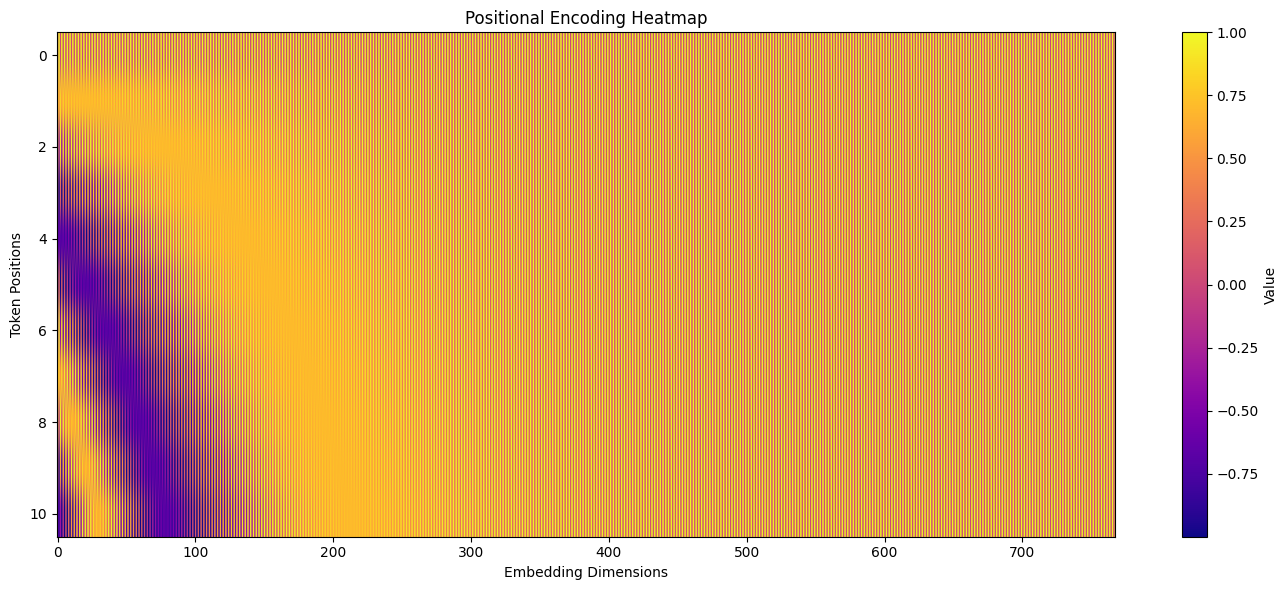

In [22]:

def get_positional_encoding(max_len, d_model):
    """
    Generate sinusoidal positional encodings of shape (max_len, d_model)
    """
    pe = np.zeros((max_len, d_model))
    position = np.arange(0, max_len).reshape(-1, 1)
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))

    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)

    return torch.tensor(pe, dtype=torch.float32)

# Shape of embeddings: (1, seq_len, hidden_size)
seq_len = embeddings.shape[1]
hidden_size = embeddings.shape[2]

# Get positional encoding for this sentence
pos_encoding = get_positional_encoding(seq_len, hidden_size)

# Add positional encoding to embeddings
embeddings_with_pos = embeddings.squeeze(0) + pos_encoding  # remove batch dim

# Print Comparison
print("\n===== Token Embeddings with Positional Encodings =====\n")
for token, embed, pos in zip(tokens, embeddings[0], pos_encoding):
    final_input = embed + pos
    print(f"Token: {token}")
    print(f"Embedding[:5]:         {embed[:5].numpy()}")
    print(f"Pos Encoding[:5]:      {pos[:5].numpy()}")
    print(f"Final Input[:5]:       {final_input[:5].numpy()}")
    print("-" * 80)

# Visualize Positional Encoding

plt.figure(figsize=(14, 6))
plt.title("Positional Encoding Heatmap")
plt.imshow(pos_encoding.numpy(), aspect='auto', cmap='plasma')
plt.xlabel("Embedding Dimensions")
plt.ylabel("Token Positions")
plt.colorbar(label="Value")
plt.tight_layout()
plt.show()
